# Visualization principles

1. Log scale
2. Jitter
3. Set the scale
4. Text on plot


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Plotting binary variables

Not directly connected to today's lesson. But many of you asked.
Let look at a case were we have 2 binary variables: 'sex' and 'survived'

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Use a barplot (two variables) or a countplot (one variable)

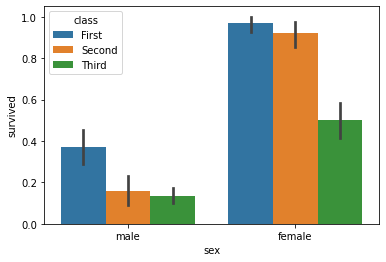

In [4]:
sns.barplot(x="sex", y="survived", hue="class",  data=titanic)
plt.show()

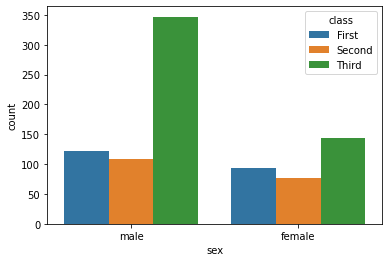

In [5]:
sns.countplot(x="sex", hue="class",  data=titanic)
plt.show()

Or use a catplot for categorical data:

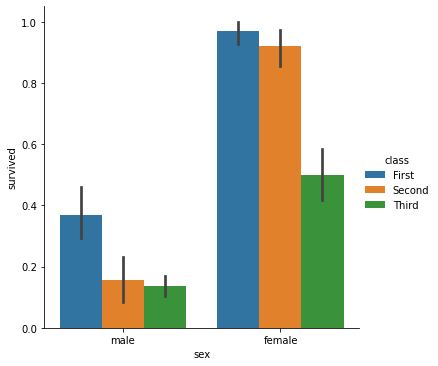

In [6]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

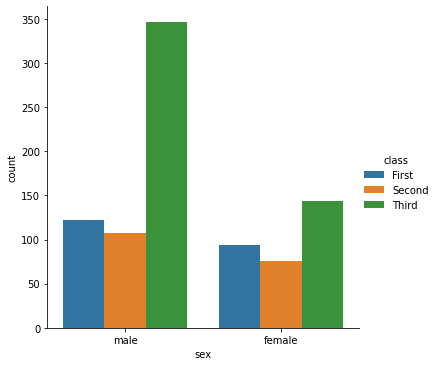

In [7]:
sns.catplot(x="sex", hue="class", kind="count", data=titanic)
plt.show()

## Log scale

In [8]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='price', ylabel='Count'>

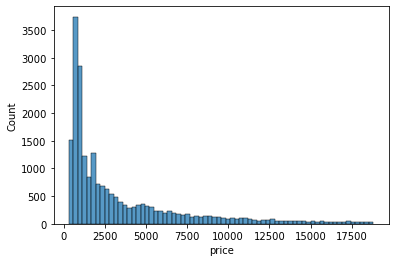

In [9]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'])

##### One option:

<AxesSubplot:xlabel='price', ylabel='Count'>

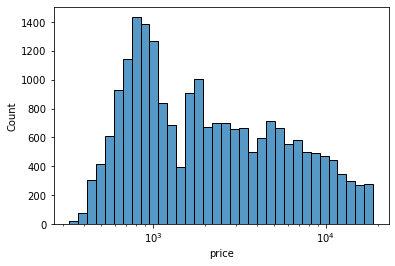

In [10]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'], log_scale = True)

##### Another option:

<AxesSubplot:xlabel='price', ylabel='Count'>

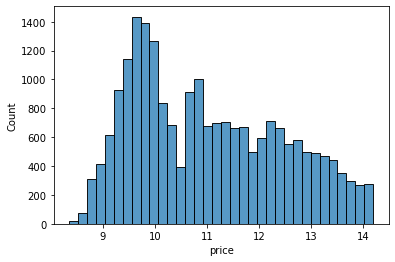

In [11]:
sns.histplot(np.log2(diamonds.price[diamonds.cut == 'Ideal']))

### Stack histogram:

<AxesSubplot:xlabel='price', ylabel='Count'>

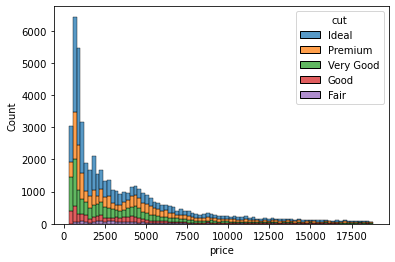

In [12]:
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",   
)

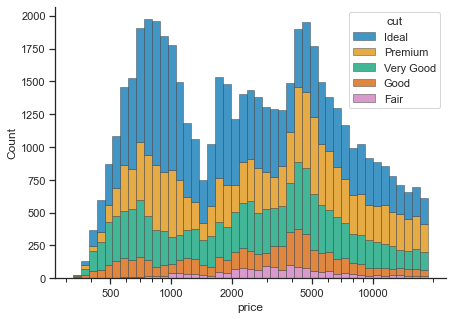

In [13]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="colorblind",
    edgecolor=".3",
    linewidth=.5, 
    log_scale = True
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.show()

## Jitter in python

Google it: [Jitter in python](https://www.google.com/search?q=jitter+in+python&sxsrf=ALeKk01NFy18kBeX8CmyToZAT-l4YIlJeQ%3A1621252840686&ei=6FqiYPSmKYzdkwXckaGgCw&oq=jitter&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIFCAAQkQIyBQgAEMsBMgUIABDLATICCAAyAggAMgUIABDLATICCAAyAggAMgIIADoECAAQQzoFCAAQsQM6CAgAELEDEJECOggILhCxAxCDAToFCC4QsQM6BwgAEIcCEBQ6AgguUJ8gWIcuYJg1aAFwAngAgAGdAYgB1giSAQMwLjiYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=gws-wiz)

Documentation contains such a good example we'll just [follow it](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

In [14]:
tips = sns.load_dataset("tips")

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

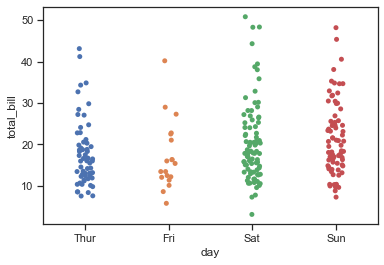

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips)

Use a smaller amount of jitter:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

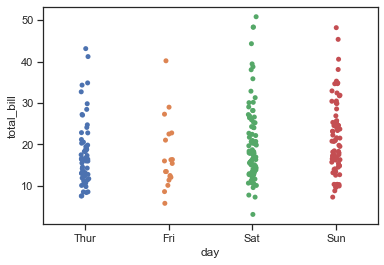

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

Jitter plus a boxplot:

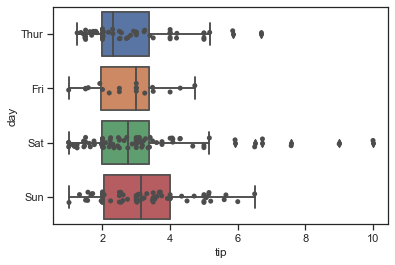

In [18]:
ax = sns.boxplot(x="tip", y="day", data=tips)
ax = sns.stripplot(x="tip", y="day", data=tips, color=".3")
ax = sns.boxplot(x="tip", y="day", data=tips)

## Set the scale

Google it: [set scale seaborn](https://www.google.com/search?q=set+scale+seaborn&sxsrf=ALeKk02NiH79RWrRRXIqusuG-vHfuyIm2A%3A1621254123926&ei=61-iYOiGOMyxkwWAiZjICQ&oq=set+scale+sea&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoCCAA6BQghEKABOggIABAIEA0QHlC8EVjyJmCULGgEcAJ4AIABogGIAbgHkgEDMC43mAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz)

##### One option:

[(0.0, 100.0)]

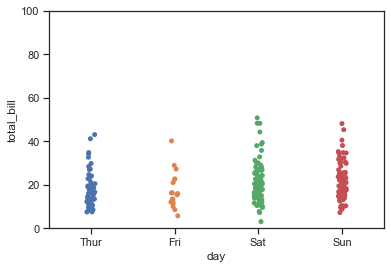

In [19]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)
ax.set(ylim=(0, 100))

##### Another option:

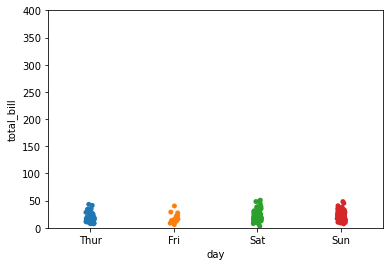

In [20]:
plt.ylim(0, 400)
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

## Add labels onto the plot

Google it: [add text to plot seaborn](https://www.google.com/search?q=add+text+to+plot+seaborn&sxsrf=ALeKk01vym2w-SfYoAOBXBgUbDCr0I04Uw%3A1621255993821&ei=OWeiYObWMdCTkwXRoIngCw&oq=add+text+to+plot+seaborn&gs_lcp=Cgdnd3Mtd2l6EAMyAggAMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoECAAQQzoGCAAQBxAeUJAcWKgzYJs1aAFwAngAgAGeAYgBmgqSAQQwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz&ved=0ahUKEwim1-ec4dDwAhXQyaQKHVFQArwQ4dUDCA4&uact=5_)

In [21]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


With a legend:

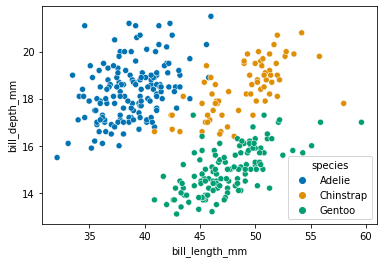

In [22]:
ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species', palette = 'colorblind')

Without a legend but with text:

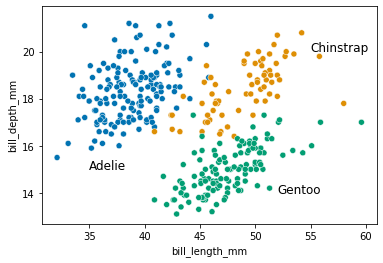

In [23]:
ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species', palette = 'colorblind', legend=False)

style = dict(size=12, color='black')
ax.text(35, 15, "Adelie",  **style)
ax.text(55, 20, "Chinstrap",  **style)
ax.text(52, 14, "Gentoo",  **style)
plt.show()